In [73]:
import numpy as np
import matplotlib.pyplot as plt

As seen before, if the pilot symbols are an impulse, then the estimate for the
channel $h$ will be a scaled version of the first $M$ samples of the received signal.

We claim that transmitting more symbols instead of an impulse gives a better estimate of h.

In [74]:
M = 20
K = 500

x1 = np.zeros(K)
x1[0] = 1
x1_cp = np.concatenate((x1[-(M-1):], x1))

x2 = 1 - 2 * np.random.randint(0, 2, K)
x2_cp = np.concatenate((x2[-(M-1):], x2))

We generated an impulse pilot symbol, and also a random pilot sequence. We generated a
random sequence so that the correlation matrix is less probable of
being singular. In practice, this sequence is set on the system definition and
is known by both the transmitter and receiver.

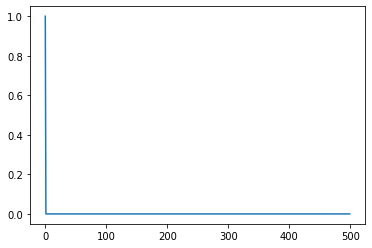

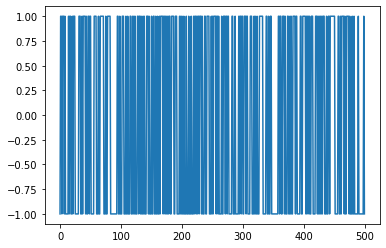

In [75]:
plt.plot(x1)
plt.figure()
plt.plot(x2)

Now we compute the correlation matrix of the pilot symbols.

In [76]:
R1 = np.zeros((M, M))
R2 = np.zeros((M, M))
for i in range(M):
    for j in range(M):
        R1[i, j] = np.correlate(x1_cp[M - 1 - j:M - 1 - j + K], x1_cp[M - 1 - i:M - 1 - i + K])
        R2[i, j] = np.correlate(x2_cp[M - 1 - j:M - 1 - j + K], x2_cp[M - 1 - i:M - 1 - i + K])

R1_inv = np.linalg.inv(R1)
R2_inv = np.linalg.inv(R2)

Now let's define some generic channel $h$ and noise variance:

In [77]:
h = np.exp([-n/2 for n in range(M)])
std = np.sqrt(0.05)

Now let's compute the received signal:

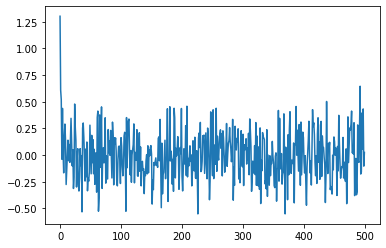

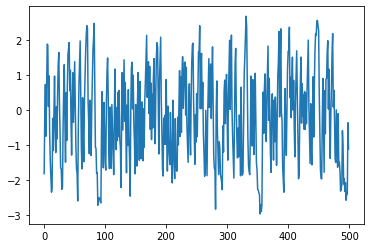

In [78]:
z1 = np.convolve(x1_cp, h)[M-1:M+K-1] + std * np.random.randn(K)
z2 = np.convolve(x2_cp, h)[M-1:M+K-1] + std * np.random.randn(K)

plt.plot(z1)
plt.figure()
plt.plot(z2)

Note how the transmitted impulse is just the tail of $h$ followed by noise.

Let's now estimate the channels:

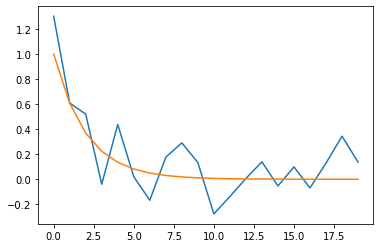

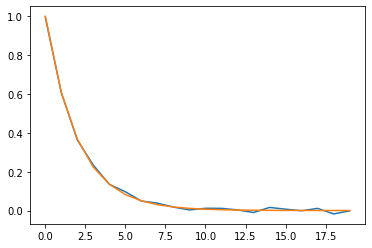

In [79]:
r1 = np.zeros(M)
r2 = np.zeros(M)
for i in range(M):
    r1[i] = np.correlate(z1, x1_cp[M - 1 - i:M - 1 - i + K])
    r2[i] = np.correlate(z2, x2_cp[M - 1 - i:M - 1 - i + K])

h1 = np.matmul(R1_inv, r1)
h2 = np.matmul(R2_inv, r2)

plt.plot(h1)
plt.plot(h)
plt.figure()
plt.plot(h2)
plt.plot(h)

Observe how closer the estimate in the scenario where the pilot sequence is not an
impulse.

To grasp an intuition on why this is true, imagine if we transmitted
two impulses separated by $M$ samples instead of just one. We would have two tails of $h$, one after the other,
and we know that the more samples of a random variable we have
the better the estimate is.

If we transmit a full pilot sequence, every received sample $z[k]$ depends on
all the channel samples $h[k]$, and we dispose of $K$ samples of $z$ to
estimate every single $h[k]$.

However, having a better estimate of $h$ comes at a cost: inverting a $M\times M$ matrix.
In the case just an impulse is transmitted, the correlation matrix is the
identity, and computing the inverse is trivial.

In the following code block, we try to approximate the inverse of `R2`
by a diagonal matrix. We see that the estimate is not that bad.

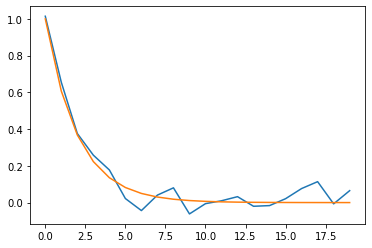

In [80]:
h2_alt = np.matmul(np.eye(20), r2) / 500
plt.plot(h2_alt)
plt.plot(h)

There are non-zero sequences of complex numbers which have zero correlation with its shifted copies.
Such a sequence could be used as pilot symbols, and the channel correlation matrix would
still be diagonal. You can find references for these sequences
[here](https://en.wikipedia.org/wiki/Constant_amplitude_zero_autocorrelation_waveform)
and a particular exemple (Zadoff-Chu) [here](https://en.wikipedia.org/wiki/Zadoff%E2%80%93Chu_sequence).
